### Predictive Analysis 
Task 2 - Explore Correlations between customer attributes, building a regression and decision tree prediction model based on findings.
Dataset - Synthesised transaction dataset containing 3 months worth of transaction,contains purchases, recurring trasactions and salary transactions.

#### Task - 1 - Exploratory Data Analysis followed firstly.

#### Importing the Libraries

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [463]:
data =  pd.read_csv('drive/MyDrive/Datasets/ANZ_synthesised_transaction.csv')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,01-08-2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,01-08-2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,01-08-2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,01-08-2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,01-08-2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [464]:
print(data.shape)
print(data.info())

(12043, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction

In [465]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [466]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Question - Finding the average (mean) trasaction amount? 
          = From the above describe() function, obtained average of trasanction amount directly. ie.  187.93.  
          Or also we can use mean() function for finding average of amount.

In [467]:
data['amount'].mean()

187.93358797641767

In [468]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

From nunique() function, the columns which have 1 unique value for overall dataset, we can remove that columns, (thats unnecessary columns)
       Also, 'transaction id' columns is unecessary as they are unique for every rows in the dataset.
'bpay_biller_code' column has large number of null values, it is conveinint to neglet that column too.

In [469]:
fdata = data.drop(['currency','merchant_code', 'country', 'transaction_id','bpay_biller_code'],axis = 1)
fdata.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

#### Arranding the date columns into 3 months trasaction classes

In [470]:
fdata['transaction_month'] = fdata['date'].str[3:]
fdata['transaction_month'].head()

0    08-2018
1    08-2018
2    08-2018
3    08-2018
4    08-2018
Name: transaction_month, dtype: object

In [471]:
fdata['transaction_month'] = pd.to_datetime(fdata['transaction_month'],format= '%m-%Y')

In [472]:
fdata['transaction_month'].nunique()

3

#### Data visulaization

Question - How many trasactions do customer make in each month on average?

transaction_month
2018-08-01    3943
2018-09-01    4013
2018-10-01    4087
Name: customer_id, dtype: int64


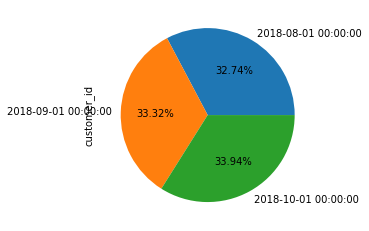

In [473]:
#sns.catplot(x = 'transaction_month', kind = 'count', data = fdata, hue = 'customer_id')
transaction_month = fdata.groupby('transaction_month').customer_id.count()
print(transaction_month)
transaction_month.plot.pie(autopct = '%.2f%%')

Total Transaction done by customers in month wise basis is given above

In [474]:
fdata.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,transaction_month
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,01-08-2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit,2018-08-01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,01-08-2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit,2018-08-01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,01-08-2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit,2018-08-01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,01-08-2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit,2018-08-01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,01-08-2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit,2018-08-01


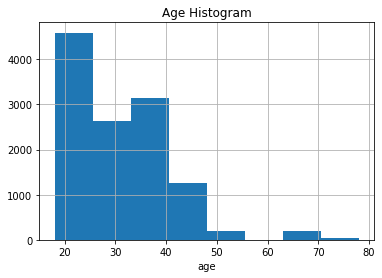

In [475]:
fdata['age'].hist(bins = 8)
plt.xlabel('age')
plt.title('Age Histogram')
plt.show()

In [476]:
fdata.groupby('transaction_month').amount.mean()

transaction_month
2018-08-01    185.121867
2018-09-01    182.045903
2018-10-01    196.427323
Name: amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


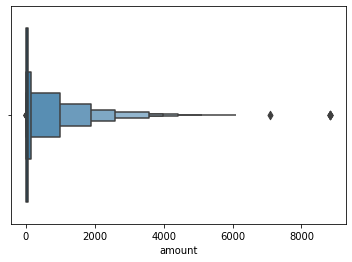

In [477]:
sns.boxenplot(fdata['amount'])

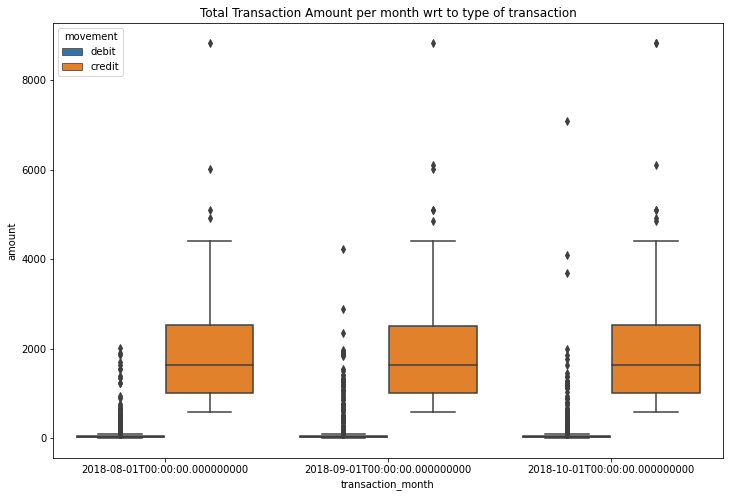

In [478]:
plt.figure(figsize= (12, 8))
sns.boxplot(x = 'transaction_month', y = 'amount',data = fdata,hue = 'movement')
plt.title('Total Transaction Amount per month wrt to type of transaction')
plt.show()

<Figure size 1080x504 with 0 Axes>

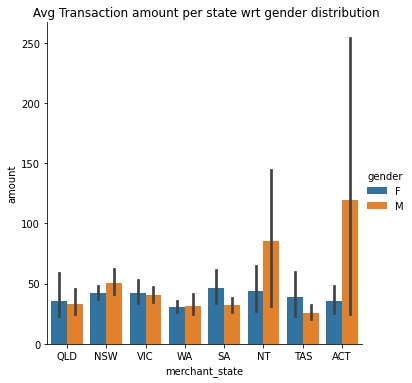

In [479]:
plt.figure(figsize= (15, 7))
sns.catplot(x = 'merchant_state', y = 'amount', kind = 'bar', data =fdata, hue= 'gender')
plt.title(' Avg Transaction amount per state wrt gender distribution')
plt.show()

In [480]:
customers = pd.DataFrame(fdata.groupby(['customer_id','first_name']).amount.mean().sort_values(ascending = False))
top_10_customers = customers.iloc[0:10,:]
top_10_customers

,,amount
customer_id,first_name,
CUS-495599312,Jonathan,693.632903
CUS-2738291516,Kenneth,567.614500
CUS-1816693151,Tim,515.583846
CUS-55310383,Melissa,497.669474
CUS-3174332735,Cindy,489.220980
CUS-2819545904,Brian,448.658413
CUS-1739931018,Kimberly,426.108800
CUS-134833760,Billy,418.742468
CUS-3201519139,Richard,392.840811


In [481]:
fdata.groupby('txn_description').txn_description.count()

txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           3783
SALES-POS     3934
Name: txn_description, dtype: int64

gender
F    5758
M    6285
Name: gender, dtype: int64


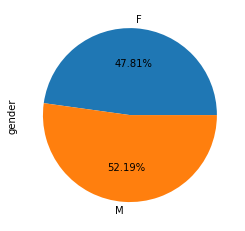

In [482]:
gender = fdata.groupby('gender').gender.count()
print(gender)
gender.plot.pie(autopct = "%.2f%%")

<Figure size 864x864 with 0 Axes>

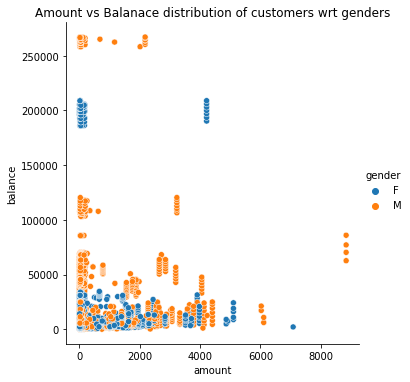

In [483]:
plt.figure(figsize= (12,12))
sns.relplot(x = 'amount', y = 'balance', data = fdata, hue = 'gender')
plt.title('Amount vs Balanace distribution of customers wrt genders')
plt.show()

Text(0.5, 1.0, 'Transaction Amount distribution for whether card present or not')

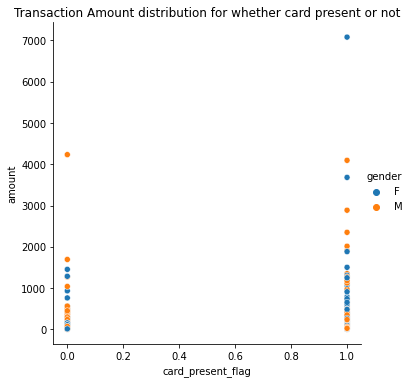

In [484]:
sns.relplot(x = 'card_present_flag', y = 'amount', hue = 'gender', data = fdata)
plt.title('Transaction Amount distribution for whether card present or not')

#### Task - 2 - Predictive Analysis followed below

Observing Relations between some Attributes

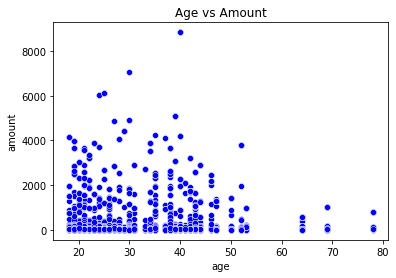

In [485]:
## Age and Amount Scatter plot
sns.scatterplot(x = 'age', y = 'amount', data = fdata, color = 'blue')
plt.title('Age vs Amount')
plt.show()

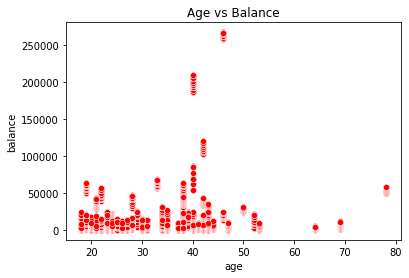

In [486]:
## Age and Balance Scatter plot
sns.scatterplot(x = 'age', y = 'balance', data = fdata, color = 'red')
plt.title('Age vs Balance')
plt.show()

#### Feature Encoding
Feature Encoding for Categorical variables

In [487]:
fdata = fdata.drop(['merchant_id','date','first_name','merchant_long_lat','extraction','long_lat','account','status','merchant_suburb','card_present_flag','merchant_state','txn_description'], axis=1)
fdata.columns

Index(['balance', 'gender', 'age', 'amount', 'customer_id', 'movement',
       'transaction_month'],
      dtype='object')

In [488]:
fdata.nunique()

balance              12006
gender                   2
age                     33
amount                4457
customer_id            100
movement                 2
transaction_month        3
dtype: int64

In [489]:
fdata['customer_id'] = fdata['customer_id'].str[4:]

In [490]:
fdata.head()

,balance,gender,age,amount,customer_id,movement,transaction_month
0,35.39,F,26,16.25,2487424745,debit,2018-08-01
1,21.20,F,26,14.19,2487424745,debit,2018-08-01
2,5.71,M,38,6.42,2142601169,debit,2018-08-01
3,2117.22,F,40,40.90,1614226872,debit,2018-08-01
4,17.95,F,26,3.25,2487424745,debit,2018-08-01


In [491]:
fdata['gender'] = fdata['gender'].astype('category')
fdata['customer_id'] = fdata['customer_id'].astype('category')
fdata['movement'] = fdata['movement'].astype('category')
fdata['transaction_month'] = fdata['transaction_month'].astype('category')
fdata.dtypes

balance               float64
gender               category
age                     int64
amount                float64
customer_id          category
movement             category
transaction_month    category
dtype: object

In [492]:
fdata['gender'] = fdata['gender'].cat.codes
fdata['customer_id'] = fdata['customer_id'].cat.codes
fdata['movement'] = fdata['movement'].cat.codes
fdata['transaction_month'] = fdata['transaction_month'].cat.codes
fdata.head()

,balance,gender,age,amount,customer_id,movement,transaction_month
0,35.39,0,26,16.25,46,1,0
1,21.20,0,26,14.19,46,1,0
2,5.71,1,38,6.42,36,1,0
3,2117.22,0,40,40.90,18,1,0
4,17.95,0,26,3.25,46,1,0


In [493]:
fdata.shape

(12043, 7)

In [494]:
fdata.isnull().sum()

balance              0
gender               0
age                  0
amount               0
customer_id          0
movement             0
transaction_month    0
dtype: int64

#### Seperating Features and Attributes

In [495]:
X = fdata.iloc[:,[0,1,2,4,5,6]]
y = fdata.iloc[:, 3].values
print(X.shape)
print(y.shape)

(12043, 6)
(12043,)


#### Splitting data into test and train

In [496]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#### Multiple Linear Regression
#### Training the model

In [568]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs= 4,normalize= True)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)

#### Predicting the test results

In [569]:
y_pred = regressor.predict(x_test)                     # y_pred = test set predicted profits and they are predicted on x_test = features of test set to get y_pred(label of test set)
np.set_printoptions(precision = 2)                   # precision=2 displays any numerical value with only two decimals after comma      
df = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis = 1)
df = pd.DataFrame(df)
df

,0,1
0,25.636779,13.87
1,1939.664158,1099.70
2,55.249986,16.70
3,52.486280,15.73
4,76.394511,42.78
...,...,...
2404,60.754545,24.34
2405,61.177868,29.00
2406,-7.002773,49.13
2407,26.111975,5.55


#### Evaluation of model

In [570]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6757742431303204

#### Decision Tree Regression model
#### Training the model

In [562]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0,min_samples_split= 2,max_features='auto',ccp_alpha= 300)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=300, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

#### Predicting the test results

In [563]:
y_pred_2 = regressor.predict(x_test)                     # y_pred = test set predicted profits and they are predicted on x_test = features of test set to get y_pred(label of test set)
np.set_printoptions(precision = 2)                   # precision=2 displays any numerical value with only two decimals after comma      
df = np.concatenate((y_pred.reshape(len(y_pred_2),1),y_test.reshape(len(y_test),1)),axis = 1)
df = pd.DataFrame(df)
df

,0,1
0,25.636779,13.87
1,1939.664158,1099.70
2,55.249986,16.70
3,52.486280,15.73
4,76.394511,42.78
...,...,...
2404,60.754545,24.34
2405,61.177868,29.00
2406,-7.002773,49.13
2407,26.111975,5.55


#### Evaluating the model

In [564]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_2)

0.8034445838211862